Source : https://databank.worldbank.org/source/world-development-indicators
Prédiction de la population

In [73]:
import pandas as pd
from IPython.display import display
# InteractiveShell.ast_node_interactivity = "all"


data = pd.read_csv("data/pop_1960_2023.csv")


data = data.drop(["Series Code"], axis=1)

# utiliser missMDA pour gérer les Nan


rename_dict = {}
# Renommer colonnes : 1960 [YR1960] => YR1960
for col in data.columns:
    if col[0].isdigit():
        rename_dict[col] = col[:4]
data = data.rename(columns=rename_dict)
        
# remettre données année en ligne et variable en colonne



data = pd.melt(data, id_vars=list(data.columns[0:3]), value_vars = list(data.columns[3:]))
data = data.rename(columns={"variable":"Year"})
print(data.columns)

# data_unique = data.drop_duplicates(subset=["Country Name", "Country Code", "Year", "Series Name"])


# Pivot pour que les valeurs de "Series Name" deviennent des colonnes
data_pivot = data.pivot_table(
    index=["Country Name", "Country Code", "Year"],
    columns="Series Name",
    values="value",
    aggfunc='first'  
)

# a vérifier la logique 

data_pivot = data_pivot.reset_index()
data = data_pivot
display(data_pivot[data_pivot["Country Name"]=="Afghanistan"])


data.to_csv("data/data_final.csv", index=False)
len(data["Country Name"].unique())

# bien penser à séparer les agrégats des données de base (pays)
data_pays = 1
data_continent = 2


Index(['Country Name', 'Country Code', 'Series Name', 'Year', 'value'], dtype='object')


Series Name,Country Name,Country Code,Year,Access to electricity (% of population),Adjusted net national income (current US$),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),Exports of goods and services (% of GDP),GDP per capita (current US$),"Life expectancy at birth, total (years)",Population growth (annual %),"Population, total","Suicide mortality rate (per 100,000 population)"
0,Afghanistan,AFG,1960,..,..,50.34,31.921,..,..,..,32.535,..,9035043,..
1,Afghanistan,AFG,1961,..,..,50.443,31.349,..,..,..,33.068,1.9622391202036,9214083,..
2,Afghanistan,AFG,1962,..,..,50.57,30.845,..,..,..,33.547,2.0445228359303,9404406,..
3,Afghanistan,AFG,1963,..,..,50.703,30.359,..,..,..,34.016,2.1052082248002,9604487,..
4,Afghanistan,AFG,1964,..,..,50.831,29.867,..,..,..,34.494,2.16119547210755,9814318,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Afghanistan,AFG,2019,97.7,17731939790.9716,36.466,6.791,..,..,496.6025042585,63.565,2.98438913621969,37856121,4.1
60,Afghanistan,AFG,2020,97.7,18585819842.831,36.051,7.113,..,10.4208171386207,510.787063366811,62.575,3.15360920291972,39068979,..
61,Afghanistan,AFG,2021,97.7,13621070038.579,35.842,7.344,..,14.342152797537,356.496214115892,61.982,2.35609779179185,40000412,..
62,Afghanistan,AFG,2022,85.3,..,35.143,6.906,..,18.3800424016375,357.261152798144,62.879,1.43570437048699,40578842,..


#Gérer les NaN avec missMDA ...


# Traitement des données de population mondiale

## Objectif
L'objectif est de nettoyer et d'enrichir les données de la Banque mondiale concernant les indicateurs de développement mondial. Plus précisément, nous allons :

1. Filtrer le dataset pour ne garder que les 195 pays reconnus
2. Ajouter une colonne "Continent" pour permettre des analyses par région géographique
3. Séparer les agrégats (comme "World") dans un dataframe distinct

## Méthodologie
1. **Nettoyage des données** : 
   - Normalisation des noms de pays pour correspondre à ceux du dataset original
   - Gestion des valeurs manquantes (représentées par "..")
   
2. **Enrichissement** :
   - Création d'un dictionnaire de correspondance pays/continent
   - Ajout de la colonne "Continent" basée sur ce dictionnaire
   
3. **Séparation des données** :
   - Création d'un dataframe `data_countries` contenant uniquement les pays
   - Création d'un dataframe `data_world` pour les données agrégées

## Structure des données résultantes
- **data_countries** : dataframe contenant les 195 pays avec des informations comme la population, les indicateurs économiques, sociaux et de santé, ainsi que le continent de chaque pays
- **data_world** : dataframe contenant les données agrégées au niveau mondial

Cette structure permettra de faciliter les analyses par pays et par continent, tout en gardant accès aux données globales si nécessaire.

In [74]:
data = pd.read_csv("data/data_final.csv")

len(data["Country Name"].unique())

# on va se ramener à 195 pays selon la liste des pays reconnus

218

In [75]:
import importlib
import continent
importlib.reload(continent)
from continent import process_countries_data

# Traitement des données et récupération des résultats

data_countries, data_world = process_countries_data() 


len(data_countries["Country Name"])

Nombre de pays uniques dans data_countries : 194
Pays manquants : {'Holy See', 'Taiwan, Province of China'}


12416

In [76]:
data = pd.read_csv("data/data_countries.csv")
data_world = pd.read_csv("data/data_world.csv")

print(data.columns)


Index(['Country Name', 'Country Code', 'Year',
       'Access to electricity (% of population)',
       'Adjusted net national income (current US$)',
       'Birth rate, crude (per 1,000 people)',
       'Death rate, crude (per 1,000 people)',
       'Electric power consumption (kWh per capita)',
       'Exports of goods and services (% of GDP)',
       'GDP per capita (current US$)',
       'Life expectancy at birth, total (years)',
       'Population growth (annual %)', 'Population, total',
       'Suicide mortality rate (per 100,000 population)',
       'Standard Country Name', 'Continent'],
      dtype='object')


Taux de valeurs manquantes par colonne:


,Nombre de valeurs manquantes,Taux de valeurs manquantes (%)
"Suicide mortality rate (per 100,000 population)",8756,70.521907
Access to electricity (% of population),6818,54.913015
Electric power consumption (kWh per capita),6645,53.519652
Adjusted net national income (current US$),5113,41.180735
Exports of goods and services (% of GDP),4093,32.965528
GDP per capita (current US$),1815,14.618235
"Life expectancy at birth, total (years)",500,4.027062
"Death rate, crude (per 1,000 people)",389,3.133054
Estimated children per woman,371,2.988080
"Birth rate, crude (per 1,000 people)",371,2.988080


C:\Users\cedri\AppData\Local\Temp\ipykernel_145212\1417620503.py:61: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




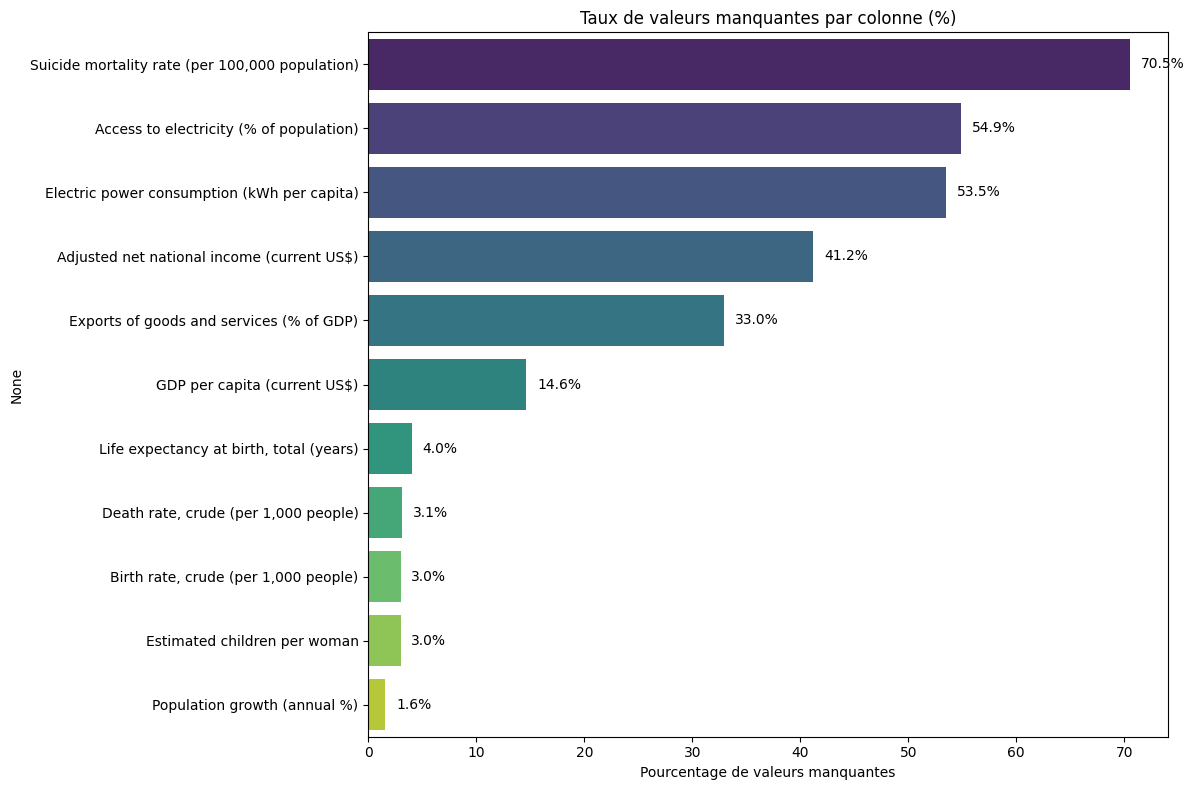

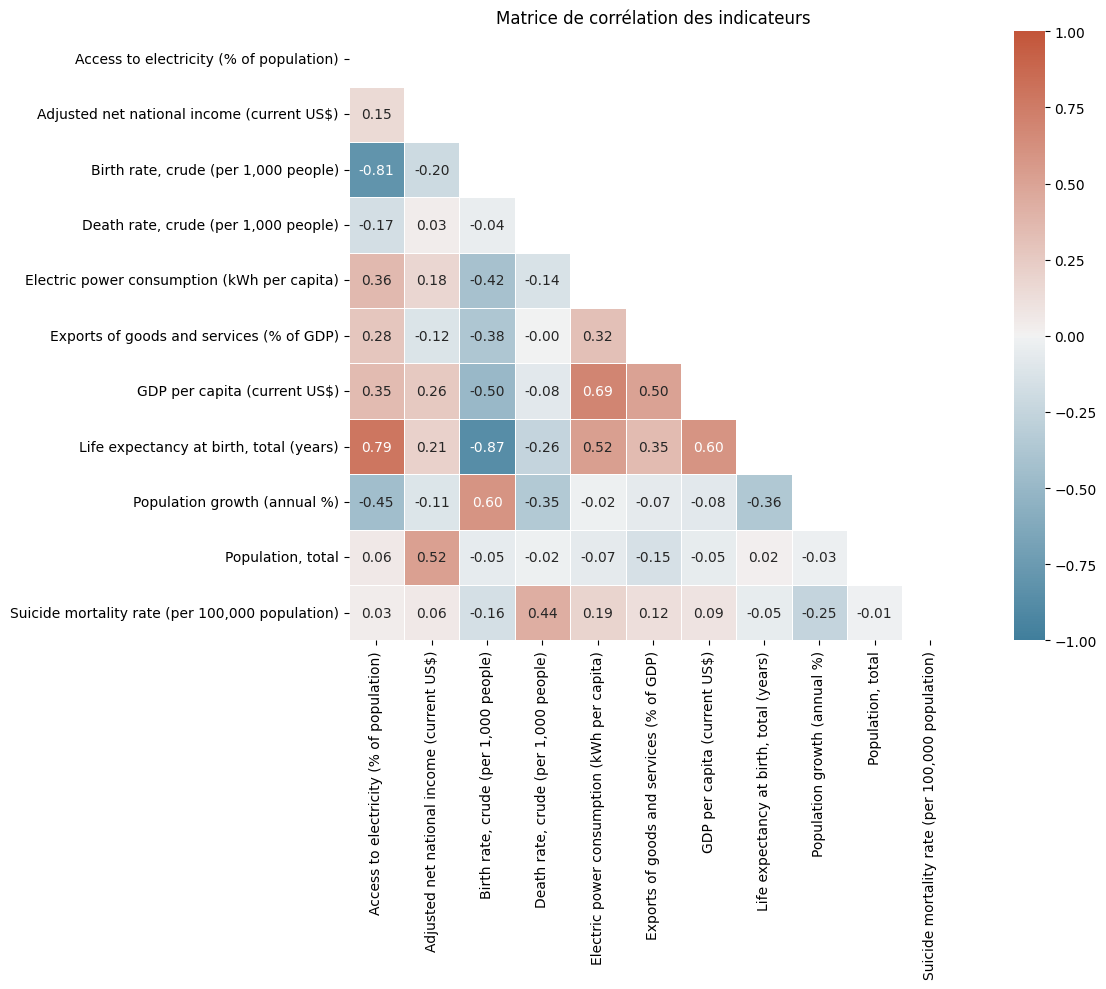

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Remplacer les ".." par des NaN
data_clean = data.copy()
data_clean = data_clean.replace("..", np.nan)

# Convertir les colonnes numériques en float
numeric_cols = [
    'Access to electricity (% of population)',
    'Adjusted net national income (current US$)',
    'Birth rate, crude (per 1,000 people)',
    'Death rate, crude (per 1,000 people)',
    'Electric power consumption (kWh per capita)',
    'Exports of goods and services (% of GDP)',
    'GDP per capita (current US$)',
    'Life expectancy at birth, total (years)',
    'Population growth (annual %)',
    'Population, total',
    'Suicide mortality rate (per 100,000 population)'
]

for col in numeric_cols:
    data_clean[col] = pd.to_numeric(data_clean[col], errors='coerce')

# Ajouter l'estimation du nombre d'enfants par femme: (CBR/1000)*40*4
data_clean['Estimated children per woman'] = (data_clean['Birth rate, crude (per 1,000 people)'] / 1000) * 40 * 4

# Définir une palette de couleurs fixe pour les continents et le monde
color_mapping = {
    "Africa": "#FF9500",      # Orange
    "Asia": "#FF5A5F",        # Rouge
    "Europe": "#007A87",      # Bleu-vert
    "North America": "#8CE071", # Vert
    "South America": "#7B0051", # Violet
    "Oceania": "#00D1C1",     # Turquoise
    "Monde": "#FFCD00"        # Jaune doré
}

# Le reste du code pour les valeurs manquantes
missing_values = data_clean.isna().sum()
missing_rate = (missing_values / len(data_clean)) * 100

missing_df = pd.DataFrame({
    'Nombre de valeurs manquantes': missing_values,
    'Taux de valeurs manquantes (%)': missing_rate
})

print("Taux de valeurs manquantes par colonne:")
display(missing_df.sort_values('Taux de valeurs manquantes (%)', ascending=False))

# 1. Visualisation des taux de valeurs manquantes
missing_df = missing_df[missing_df['Nombre de valeurs manquantes'] > 0].sort_values('Taux de valeurs manquantes (%)', ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=missing_df['Taux de valeurs manquantes (%)'].values, 
                y=missing_df.index, 
                palette='viridis')

for i, v in enumerate(missing_df['Taux de valeurs manquantes (%)']):
    ax.text(v + 1, i, f"{v:.1f}%", va='center')

plt.title('Taux de valeurs manquantes par colonne (%)')
plt.xlabel('Pourcentage de valeurs manquantes')
plt.tight_layout()
plt.show()

# Matrice de corrélation
recent_data = data_clean[data_clean['Year'] >= 2010].copy()
corr_matrix = recent_data[numeric_cols].corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f")
plt.title('Matrice de corrélation des indicateurs')
plt.tight_layout()
plt.show()

# Fonction pour obtenir l'année la plus récente avec des données disponibles
def get_latest_year_with_data(df, columns, start_year=2023, min_countries=10):
    year = start_year
    while year >= 2010:
        year_data = df[df['Year'] == year].dropna(subset=columns)
        if len(year_data) >= min_countries:
            return year
        year -= 1
    return 2020

# 2. Graphique de l'évolution de la population mondiale et par continent
# 2.1 Graphique pour la population mondiale seule
world_pop = data_world[['Year', 'Population, total']].replace('..', np.nan)
world_pop['Population, total'] = pd.to_numeric(world_pop['Population, total'], errors='coerce')
world_pop = world_pop.dropna()

fig_world = go.Figure()
fig_world.add_trace(go.Scatter(
    x=world_pop['Year'],
    y=world_pop['Population, total']/1e9,
    mode='lines',
    name='Population mondiale',
    line=dict(color=color_mapping['Monde'], width=3)
))

fig_world.update_layout(
    title='Évolution de la population mondiale (1960-2023)',
    xaxis=dict(
        title='Année',
        tickmode='linear', 
        tick0=1960, 
        dtick=10
    ),
    yaxis=dict(
        title='Population (milliards)',
        tickformat='.2f'
    ),
    hovermode="x"
)

# Ajouter une annotation pour le taux de croissance global
first_year = world_pop['Year'].min()
last_year = world_pop['Year'].max()
first_pop = world_pop[world_pop['Year'] == first_year]['Population, total'].values[0]
last_pop = world_pop[world_pop['Year'] == last_year]['Population, total'].values[0]
growth_rate = (last_pop / first_pop) ** (1 / (last_year - first_year)) - 1

fig_world.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"Taux de croissance annuel moyen: {growth_rate*100:.2f}%",
    showarrow=False,
    font=dict(
        family="Arial",
        size=14,
        color="black"
    ),
    align="center",
    bgcolor="rgba(255, 255, 255, 0.8)",
    bordercolor="black",
    borderwidth=1,
    borderpad=4
)

fig_world.show()

# 2.2 Graphique en grille pour l'évolution des populations par continent
pop_by_continent = data_clean.groupby(['Continent', 'Year'])['Population, total'].sum().reset_index()
pop_by_continent = pop_by_continent.dropna()

# S'assurer que tous les continents sont présents
all_continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
present_continents = pop_by_continent['Continent'].unique()
missing_continents = [c for c in all_continents if c not in present_continents]

if missing_continents:
    print(f"Continents manquants dans les données: {missing_continents}")
    for continent in missing_continents:
        dummy_data = pd.DataFrame({
            'Continent': [continent] * len(world_pop),
            'Year': world_pop['Year'],
            'Population, total': [0] * len(world_pop)
        })
        pop_by_continent = pd.concat([pop_by_continent, dummy_data])

# Traductions pour les titres de continents
continent_translations = {
    'Africa': 'Afrique',
    'Asia': 'Asie',
    'Europe': 'Europe',
    'North America': 'Amérique du Nord',
    'South America': 'Amérique du Sud',
    'Oceania': 'Océanie'
}

# Créer une grille de 2x3 pour les 6 continents
subplot_titles = [continent_translations.get(continent, continent) for continent in all_continents]
fig_continents = make_subplots(
    rows=2, 
    cols=3, 
    subplot_titles=subplot_titles,
    shared_xaxes=True,
    vertical_spacing=0.1
)

# Ajouter les traces pour chaque continent avec son échelle appropriée
for i, continent in enumerate(all_continents):
    row = i // 3 + 1
    col = i % 3 + 1
    
    continent_data = pop_by_continent[pop_by_continent['Continent'] == continent]
    
    if not continent_data.empty:
        # Calculer les valeurs en milliards ou millions selon la taille de la population
        max_pop = continent_data['Population, total'].max()
        if max_pop > 1e9:
            y_values = continent_data['Population, total'] / 1e9
            y_unit = "milliards"
        else:
            y_values = continent_data['Population, total'] / 1e6
            y_unit = "millions"
        
        # Ajouter la trace pour ce continent
        fig_continents.add_trace(
            go.Scatter(
                x=continent_data['Year'],
                y=y_values,
                mode='lines',
                name=continent_translations.get(continent, continent),
                line=dict(color=color_mapping[continent], width=2)
            ),
            row=row, 
            col=col
        )
        
        # Calculer et afficher le taux de croissance comme texte sur le graphique
        if len(continent_data) > 1:
            first_year_data = continent_data.sort_values('Year').iloc[0]
            last_year_data = continent_data.sort_values('Year').iloc[-1]
            years_diff = last_year_data['Year'] - first_year_data['Year']
            
            if years_diff > 0:
                continent_growth = (last_year_data['Population, total'] / first_year_data['Population, total']) ** (1 / years_diff) - 1
                
                # Ajouter le taux comme texte sur le graphique plutôt que comme annotation
                midpoint_year = (first_year_data['Year'] + last_year_data['Year']) / 2
                midpoint_y = y_values.max() * 0.8
                
                fig_continents.add_trace(
                    go.Scatter(
                        x=[midpoint_year],
                        y=[midpoint_y],
                        mode='text',
                        text=[f"Croissance: {continent_growth*100:.2f}%/an"],
                        textfont=dict(
                            size=10,
                            color='black'
                        ),
                        showlegend=False,
                        hoverinfo='none'
                    ),
                    row=row,
                    col=col
                )
                
                # Mise à jour des axes y pour indiquer l'unité
for i, continent in enumerate(all_continents):
    row = i // 3 + 1
    col = i % 3 + 1
    
    continent_data = pop_by_continent[pop_by_continent['Continent'] == continent]
    if not continent_data.empty:
        max_pop = continent_data['Population, total'].max()
        if max_pop > 1e9:
            y_unit = "milliards"
        else:
            y_unit = "millions"
            
        fig_continents.update_yaxes(
            title_text=f"Population ({y_unit})",
            row=row,
            col=col
        )
                
# Mise à jour de la mise en page
fig_continents.update_layout(
    title="Évolution de la population par continent (1960-2023)",
    showlegend=False,
    height=700,
    width=1000
)

# Mise à jour des axes x pour avoir le même format
for i in range(1, 7):
    row = (i-1) // 3 + 1
    col = (i-1) % 3 + 1
    
    fig_continents.update_xaxes(
        title_text="Année" if row == 2 else None,
        tickmode='linear',
        tick0=1960,
        dtick=20,
        row=row,
        col=col
    )

fig_continents.show()
# Pour les autres graphiques utilisant des continents, on va aussi fixer les couleurs

# 3. Carte choroplèthe - PIB par habitant 
gdp_year = get_latest_year_with_data(data_clean, ['GDP per capita (current US$)'])
gdp_latest = data_clean[data_clean['Year'] == gdp_year].copy()
gdp_latest = gdp_latest.dropna(subset=['GDP per capita (current US$)'])

fig = px.choropleth(gdp_latest, 
                    locations="Country Code", 
                    color="GDP per capita (current US$)",
                    hover_name="Country Name", 
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title=f"PIB par habitant par pays ({gdp_year})")
fig.update_layout(title_text=f"PIB par habitant par pays ({gdp_year})")
fig.show()

# 4. Carte choroplèthe - Croissance de la population
growth_year = get_latest_year_with_data(data_clean, ['Population growth (annual %)'])
growth_latest = data_clean[data_clean['Year'] == growth_year].copy()
growth_latest = growth_latest.dropna(subset=['Population growth (annual %)'])

fig = px.choropleth(growth_latest, 
                    locations="Country Code", 
                    color="Population growth (annual %)",
                    hover_name="Country Name", 
                    color_continuous_scale=px.colors.diverging.RdBu,
                    title=f"Croissance annuelle de la population par pays ({growth_year})")
fig.update_layout(title_text=f"Croissance annuelle de la population par pays ({growth_year})")
fig.show()

# 5. Carte choroplèthe - Nombre estimé d'enfants par femme
fertility_year = get_latest_year_with_data(data_clean, ['Birth rate, crude (per 1,000 people)'])
fertility_latest = data_clean[data_clean['Year'] == fertility_year].copy()
fertility_latest = fertility_latest.dropna(subset=['Birth rate, crude (per 1,000 people)'])

fig = px.choropleth(fertility_latest, 
                    locations="Country Code", 
                    color="Estimated children per woman",
                    hover_name="Country Name",
                    hover_data=["Birth rate, crude (per 1,000 people)"],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title=f"Nombre estimé d'enfants par femme ({fertility_year}) - Estimation basée sur: (CBR/1000)*40*4")
fig.update_layout(title_text=f"Nombre estimé d'enfants par femme ({fertility_year}) - Estimation basée sur: (CBR/1000)*40*4")
fig.show()

# 6. Top 10 pays les plus peuplés
pop_year = get_latest_year_with_data(data_clean, ['Population, total'], min_countries=100)
pop_latest = data_clean[data_clean['Year'] == pop_year].copy()
pop_latest = pop_latest.dropna(subset=['Population, total'])
pop_latest = pop_latest.sort_values('Population, total', ascending=False).head(10)

custom_colors = px.colors.qualitative.Prism[:10]

fig = px.bar(pop_latest, 
             x='Country Name', 
             y='Population, total',
             title=f'Top 10 pays les plus peuplés ({pop_year})',
             labels={'Population, total': 'Population', 'Country Name': 'Pays'},
             color='Country Name',
             color_discrete_sequence=custom_colors)

fig.update_traces(
    texttemplate='%{y:,.0f}', 
    textposition='inside',
    hovertemplate='<b>%{x}</b><br>Population: %{y:,.0f}'
)

fig.update_layout(
    xaxis={'categoryorder': 'total descending', 'title': 'Pays'},
    xaxis_tickangle=-45,
    yaxis=dict(title='Population'),
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    plot_bgcolor='rgb(248,248,248)',
    title_text=f'Top 10 des pays les plus peuplés ({pop_year})'
)

world_population = world_pop[world_pop['Year'] == pop_year]['Population, total'].values[0] if pop_year in world_pop['Year'].values else world_pop['Population, total'].iloc[-1]

fig.show()

# 7. Scatter plots avec couleurs de continents fixes
# Fonction pour créer un scatter plot avec des couleurs de continents fixes
def create_continent_scatter(data_df, x_col, y_col, size_col='Population, total', 
                             title="", x_label="", y_label="", use_log_x=True, year=None):
    
    fig = go.Figure()
    
    # Ajouter chaque continent séparément avec une couleur fixe
    for continent in all_continents:
        continent_data = data_df[data_df['Continent'] == continent]
        if not continent_data.empty:
            fig.add_trace(go.Scatter(
                x=continent_data[x_col],
                y=continent_data[y_col],
                mode='markers',
                name=continent,
                marker=dict(
                    color=color_mapping[continent],
                    size=continent_data[size_col]/1e6 if size_col else 10,  # Taille proportionnelle à la population
                    sizemode='area',
                    sizeref=0.1,
                    sizemin=4
                ),
                text=continent_data['Country Name'],
                hovertemplate="<b>%{text}</b><br>" +
                              f"{x_label}: %{{x}}<br>" +
                              f"{y_label}: %{{y}}<br>" +
                              "Population: %{marker.size:.1f}M<br>" +
                              "<extra></extra>"
            ))
    
    # Ajouter une ligne de tendance (régression)
    if len(data_df) > 2:
        try:
            from scipy import stats
            slope, intercept, r_value, p_value, std_err = stats.linregress(
                data_df[x_col].astype(float), 
                data_df[y_col].astype(float)
            )
            
            x_range = data_df[x_col].astype(float)
            x_min, x_max = min(x_range), max(x_range)
            x_trend = [x_min, x_max]
            y_trend = [slope * x + intercept for x in x_trend]
            
            fig.add_trace(go.Scatter(
                x=x_trend, 
                y=y_trend,
                mode='lines',
                name=f'Tendance (r²={r_value**2:.2f})',
                line=dict(color='black', width=1, dash='solid')
            ))
        except Exception as e:
            print(f"Erreur lors du calcul de la tendance: {e}")
    
    # Mise en page
    fig.update_layout(
        title=title + (f" ({year})" if year else ""),
        xaxis=dict(
            title=x_label,
            type='log' if use_log_x else 'linear'
        ),
        yaxis=dict(title=y_label),
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )
    
    return fig

# 7. Espérance de vie vs PIB par habitant
life_gdp_year = get_latest_year_with_data(data_clean, ['Life expectancy at birth, total (years)', 'GDP per capita (current US$)'])
scatter_latest = data_clean[data_clean['Year'] == life_gdp_year].copy()
scatter_latest = scatter_latest.dropna(subset=['Life expectancy at birth, total (years)', 'GDP per capita (current US$)'])

fig = create_continent_scatter(
    scatter_latest,
    'GDP per capita (current US$)',
    'Life expectancy at birth, total (years)',
    title="Espérance de vie vs PIB par habitant",
    x_label="PIB par habitant (USD)",
    y_label="Espérance de vie (années)",
    use_log_x=True,
    year=life_gdp_year
)
fig.show()

# 8. Taux de natalité vs Espérance de vie
birth_life_year = get_latest_year_with_data(data_clean, ['Birth rate, crude (per 1,000 people)', 'Life expectancy at birth, total (years)'])
birth_life_latest = data_clean[data_clean['Year'] == birth_life_year].dropna(subset=['Birth rate, crude (per 1,000 people)', 'Life expectancy at birth, total (years)'])

fig = create_continent_scatter(
    birth_life_latest,
    'Birth rate, crude (per 1,000 people)',
    'Life expectancy at birth, total (years)',
    title="Corrélation entre taux de natalité et espérance de vie",
    x_label="Taux de natalité (pour 1000 habitants)",
    y_label="Espérance de vie (années)",
    use_log_x=False,
    year=birth_life_year
)
fig.show()

# 9. Taux de natalité vs Accès à l'électricité
birth_elec_year = get_latest_year_with_data(data_clean, ['Birth rate, crude (per 1,000 people)', 'Access to electricity (% of population)'])
birth_elec_latest = data_clean[data_clean['Year'] == birth_elec_year].dropna(subset=['Birth rate, crude (per 1,000 people)', 'Access to electricity (% of population)'])

fig = create_continent_scatter(
    birth_elec_latest,
    'Birth rate, crude (per 1,000 people)',
    'Access to electricity (% of population)',
    title="Corrélation entre taux de natalité et accès à l'électricité",
    x_label="Taux de natalité (pour 1000 habitants)",
    y_label="Accès à l'électricité (% de la population)",
    use_log_x=False,
    year=birth_elec_year
)
fig.show()

# 10. Consommation électrique vs PIB par habitant (sans échelle logarithmique)
elec_gdp_year = get_latest_year_with_data(data_clean, ['Electric power consumption (kWh per capita)', 'GDP per capita (current US$)'])
elec_gdp_latest = data_clean[data_clean['Year'] == elec_gdp_year].dropna(subset=['Electric power consumption (kWh per capita)', 'GDP per capita (current US$)'])

# Si pas assez de données disponibles pour la dernière année, chercher l'année précédente
if len(elec_gdp_latest) < 10:
    for year in range(elec_gdp_year-1, 2010, -1):
        temp_data = data_clean[data_clean['Year'] == year].dropna(
            subset=['Electric power consumption (kWh per capita)', 'GDP per capita (current US$)'])
        if len(temp_data) >= 10:
            elec_gdp_year = year
            elec_gdp_latest = temp_data
            break

fig = create_continent_scatter(
    elec_gdp_latest,
    'GDP per capita (current US$)',
    'Electric power consumption (kWh per capita)',
    title="Corrélation entre consommation électrique et PIB par habitant",
    x_label="PIB par habitant (USD)",
    y_label="Consommation électrique (kWh par habitant)",
    use_log_x=False,  # Sans échelle logarithmique comme demandé
    year=elec_gdp_year
)
fig.show()

Taux de valeurs manquantes par colonne:


,Nombre de valeurs manquantes,Taux de valeurs manquantes (%)
"Suicide mortality rate (per 100,000 population)",8756,70.521907
Access to electricity (% of population),6818,54.913015
Electric power consumption (kWh per capita),6645,53.519652
Adjusted net national income (current US$),5113,41.180735
Exports of goods and services (% of GDP),4093,32.965528
GDP per capita (current US$),1815,14.618235
"Life expectancy at birth, total (years)",500,4.027062
"Death rate, crude (per 1,000 people)",389,3.133054
Estimated children per woman,371,2.988080
"Birth rate, crude (per 1,000 people)",371,2.988080


C:\Users\cedri\AppData\Local\Temp\ipykernel_145212\3950121849.py:63: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




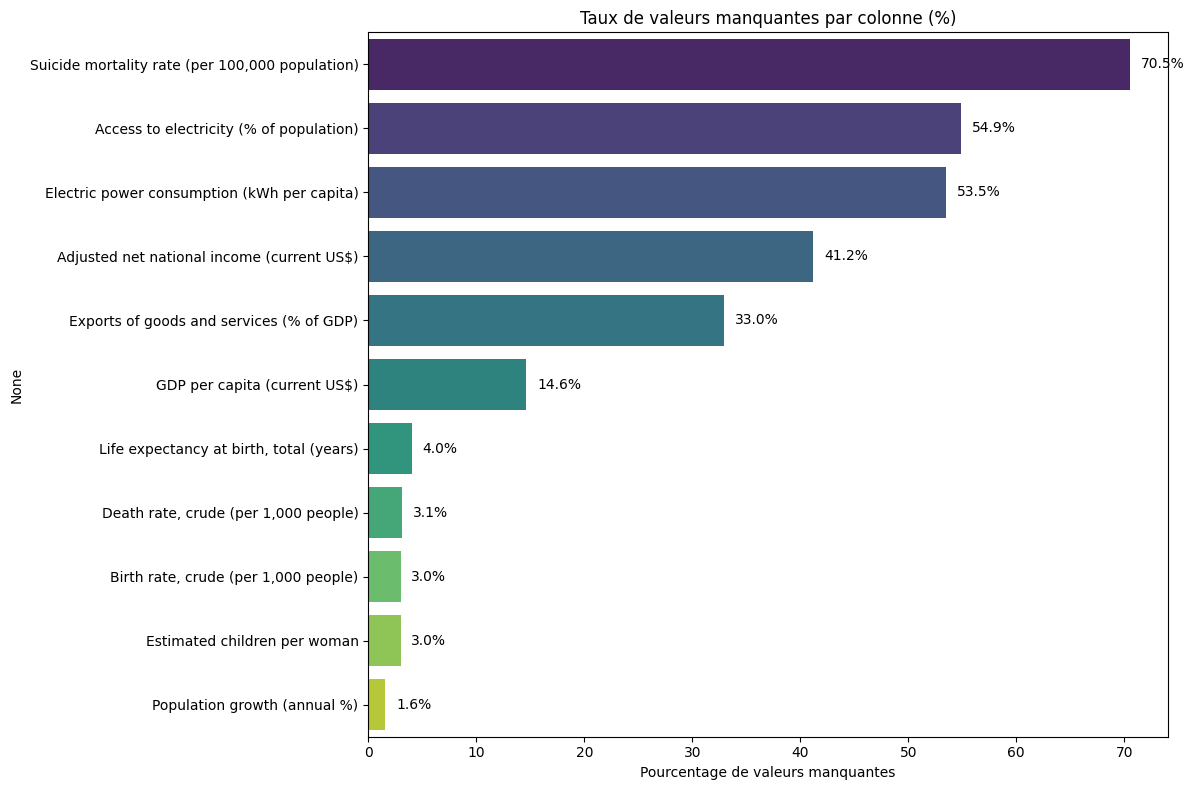

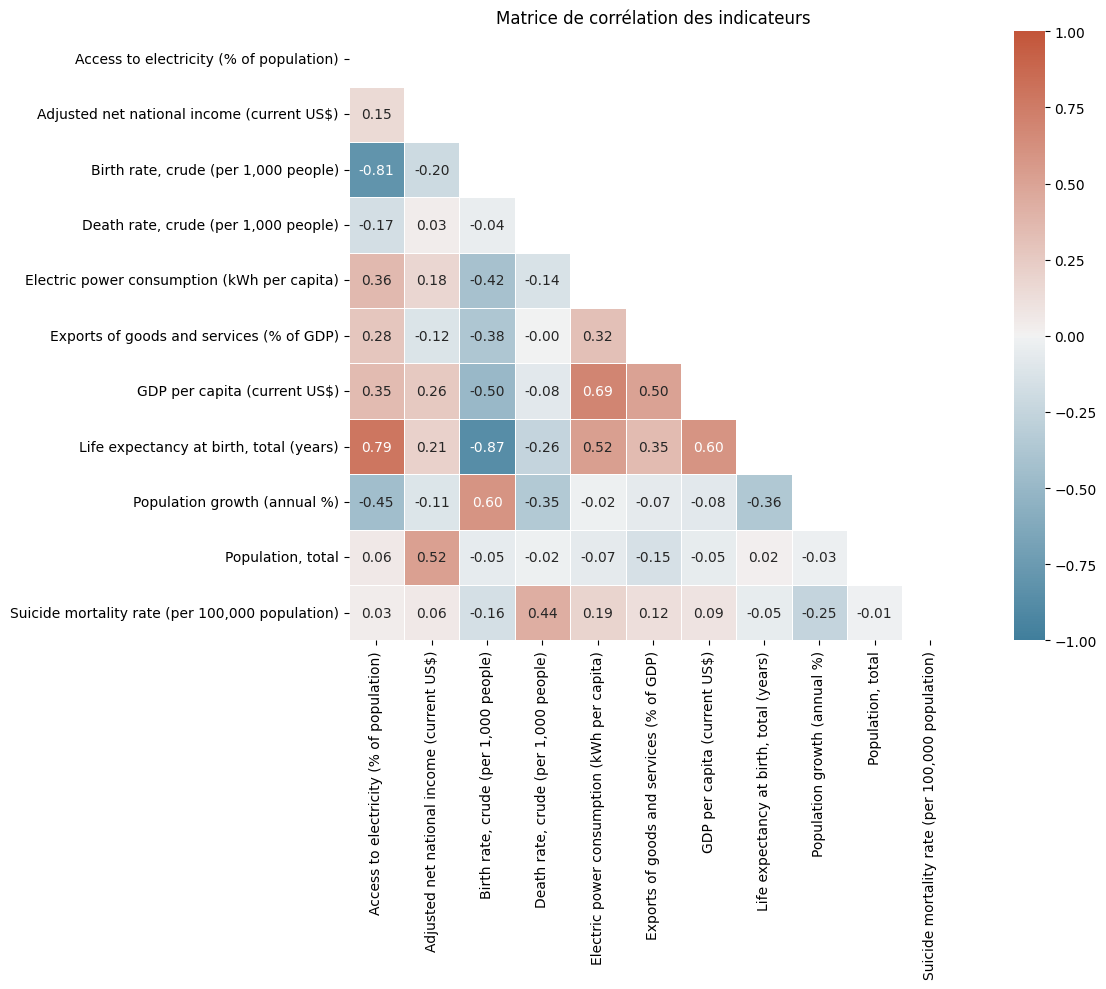

In [80]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Remplacer les ".." par des NaN
data_clean = data.copy()
data_clean = data_clean.replace("..", np.nan)

# Convertir les colonnes numériques en float
numeric_cols = [
    'Access to electricity (% of population)',
    'Adjusted net national income (current US$)',
    'Birth rate, crude (per 1,000 people)',
    'Death rate, crude (per 1,000 people)',
    'Electric power consumption (kWh per capita)',
    'Exports of goods and services (% of GDP)',
    'GDP per capita (current US$)',
    'Life expectancy at birth, total (years)',
    'Population growth (annual %)',
    'Population, total',
    'Suicide mortality rate (per 100,000 population)'
]

for col in numeric_cols:
    data_clean[col] = pd.to_numeric(data_clean[col], errors='coerce')

# Ajouter l'estimation du nombre d'enfants par femme: (CBR/1000)*40*4
data_clean['Estimated children per woman'] = (data_clean['Birth rate, crude (per 1,000 people)'] / 1000) * 40 * 4

# estimation basé sur 40 ans de période reproductive et 25% de la pop dans cette tranche 15-55 ...

# Définir une palette de couleurs fixe pour les continents et le monde
color_mapping = {
    "Africa": "#FF9500",      # Orange
    "Asia": "#FF5A5F",        # Rouge
    "Europe": "#007A87",      # Bleu-vert
    "North America": "#8CE071", # Vert
    "South America": "#7B0051", # Violet
    "Oceania": "#00D1C1",     # Turquoise
    "Monde": "#FFCD00"        # Jaune doré
}

# Le reste du code pour les valeurs manquantes
missing_values = data_clean.isna().sum()
missing_rate = (missing_values / len(data_clean)) * 100

missing_df = pd.DataFrame({
    'Nombre de valeurs manquantes': missing_values,
    'Taux de valeurs manquantes (%)': missing_rate
})

print("Taux de valeurs manquantes par colonne:")
display(missing_df.sort_values('Taux de valeurs manquantes (%)', ascending=False))

# 1. Visualisation des taux de valeurs manquantes
missing_df = missing_df[missing_df['Nombre de valeurs manquantes'] > 0].sort_values('Taux de valeurs manquantes (%)', ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=missing_df['Taux de valeurs manquantes (%)'].values, 
                y=missing_df.index, 
                palette='viridis')

for i, v in enumerate(missing_df['Taux de valeurs manquantes (%)']):
    ax.text(v + 1, i, f"{v:.1f}%", va='center')

plt.title('Taux de valeurs manquantes par colonne (%)')
plt.xlabel('Pourcentage de valeurs manquantes')
plt.tight_layout()
plt.show()

# Matrice de corrélation
recent_data = data_clean[data_clean['Year'] >= 2010].copy()
corr_matrix = recent_data[numeric_cols].corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f")
plt.title('Matrice de corrélation des indicateurs')
plt.tight_layout()
plt.show()

# Fonction pour obtenir l'année la plus récente avec des données disponibles
def get_latest_year_with_data(df, columns, start_year=2023, min_countries=10):
    year = start_year
    while year >= 2010:
        year_data = df[df['Year'] == year].dropna(subset=columns)
        if len(year_data) >= min_countries:
            return year
        year -= 1
    return 2020

# 2. Graphique de l'évolution de la population mondiale et par continent
# 2.1 Graphique pour la population mondiale seule
world_pop = data_world[['Year', 'Population, total']].replace('..', np.nan)
world_pop['Population, total'] = pd.to_numeric(world_pop['Population, total'], errors='coerce')
world_pop = world_pop.dropna()

fig_world = go.Figure()
fig_world.add_trace(go.Scatter(
    x=world_pop['Year'],
    y=world_pop['Population, total']/1e9,
    mode='lines',
    name='Population mondiale',
    line=dict(color=color_mapping['Monde'], width=3)
))

fig_world.update_layout(
    title='Évolution de la population mondiale (1960-2023)',
    xaxis=dict(
        title='Année',
        tickmode='linear', 
        tick0=1960, 
        dtick=10
    ),
    yaxis=dict(
        title='Population (milliards)',
        tickformat='.2f'
    ),
    hovermode="x"
)

# Ajouter une annotation pour le taux de croissance global
first_year = world_pop['Year'].min()
last_year = world_pop['Year'].max()
first_pop = world_pop[world_pop['Year'] == first_year]['Population, total'].values[0]
last_pop = world_pop[world_pop['Year'] == last_year]['Population, total'].values[0]
growth_rate = (last_pop / first_pop) ** (1 / (last_year - first_year)) - 1

fig_world.add_annotation(
    x=0.5,
    y=0.05,
    xref="paper",
    yref="paper",
    text=f"Taux de croissance annuel moyen: {growth_rate*100:.2f}%",
    showarrow=False,
    font=dict(
        family="Arial",
        size=14,
        color="black"
    ),
    align="center",
    bgcolor="rgba(255, 255, 255, 0.8)",
    bordercolor="black",
    borderwidth=1,
    borderpad=4
)

fig_world.show()

# 2.2 Graphique en grille pour l'évolution des populations par continent
pop_by_continent = data_clean.groupby(['Continent', 'Year'])['Population, total'].sum().reset_index()
pop_by_continent = pop_by_continent.dropna()

# S'assurer que tous les continents sont présents
all_continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
present_continents = pop_by_continent['Continent'].unique()
missing_continents = [c for c in all_continents if c not in present_continents]

if missing_continents:
    print(f"Continents manquants dans les données: {missing_continents}")
    for continent in missing_continents:
        dummy_data = pd.DataFrame({
            'Continent': [continent] * len(world_pop),
            'Year': world_pop['Year'],
            'Population, total': [0] * len(world_pop)
        })
        pop_by_continent = pd.concat([pop_by_continent, dummy_data])

# Traductions pour les titres de continents
continent_translations = {
    'Africa': 'Afrique',
    'Asia': 'Asie',
    'Europe': 'Europe',
    'North America': 'Amérique du Nord',
    'South America': 'Amérique du Sud',
    'Oceania': 'Océanie'
}

# Créer une grille de 2x3 pour les 6 continents
subplot_titles = [continent_translations.get(continent, continent) for continent in all_continents]
fig_continents = make_subplots(
    rows=2, 
    cols=3, 
    subplot_titles=subplot_titles,
    shared_xaxes=True,
    vertical_spacing=0.1
)

# Ajouter les traces pour chaque continent avec son échelle appropriée
for i, continent in enumerate(all_continents):
    row = i // 3 + 1
    col = i % 3 + 1
    
    continent_data = pop_by_continent[pop_by_continent['Continent'] == continent]
    
    if not continent_data.empty:
        # Calculer les valeurs en milliards ou millions selon la taille de la population
        max_pop = continent_data['Population, total'].max()
        if max_pop > 1e9:
            y_values = continent_data['Population, total'] / 1e9
            y_unit = "milliards"
        else:
            y_values = continent_data['Population, total'] / 1e6
            y_unit = "millions"
        
        # Ajouter la trace pour ce continent
        fig_continents.add_trace(
            go.Scatter(
                x=continent_data['Year'],
                y=y_values,
                mode='lines',
                name=continent_translations.get(continent, continent),
                line=dict(color=color_mapping[continent], width=2)
            ),
            row=row, 
            col=col
        )
        
        # Calculer et afficher le taux de croissance comme texte sur le graphique
        if len(continent_data) > 1:
            first_year_data = continent_data.sort_values('Year').iloc[0]
            last_year_data = continent_data.sort_values('Year').iloc[-1]
            years_diff = last_year_data['Year'] - first_year_data['Year']
            
            if years_diff > 0:
                continent_growth = (last_year_data['Population, total'] / first_year_data['Population, total']) ** (1 / years_diff) - 1
                
                # Ajouter le taux comme texte sur le graphique plutôt que comme annotation
                midpoint_year = (first_year_data['Year'] + last_year_data['Year']) / 2
                midpoint_y = y_values.max() * 0.8
                
                fig_continents.add_trace(
                    go.Scatter(
                        x=[midpoint_year],
                        y=[midpoint_y],
                        mode='text',
                        text=[f"Croissance: {continent_growth*100:.2f}%/an"],
                        textfont=dict(
                            size=10,
                            color='black'
                        ),
                        showlegend=False,
                        hoverinfo='none'
                    ),
                    row=row,
                    col=col
                )
                
                # Mise à jour des axes y pour indiquer l'unité
for i, continent in enumerate(all_continents):
    row = i // 3 + 1
    col = i % 3 + 1
    
    continent_data = pop_by_continent[pop_by_continent['Continent'] == continent]
    if not continent_data.empty:
        max_pop = continent_data['Population, total'].max()
        if max_pop > 1e9:
            y_unit = "milliards"
        else:
            y_unit = "millions"
            
        fig_continents.update_yaxes(
            title_text=f"Population ({y_unit})",
            row=row,
            col=col
        )
                
# Mise à jour de la mise en page
fig_continents.update_layout(
    title="Évolution de la population par continent (1960-2023)",
    showlegend=False,
    height=700,
    width=1000
)

# Mise à jour des axes x pour avoir le même format
for i in range(1, 7):
    row = (i-1) // 3 + 1
    col = (i-1) % 3 + 1
    
    fig_continents.update_xaxes(
        title_text="Année" if row == 2 else None,
        tickmode='linear',
        tick0=1960,
        dtick=20,
        row=row,
        col=col
    )

fig_continents.show()
# Pour les autres graphiques utilisant des continents, on va aussi fixer les couleurs

# 3. Carte choroplèthe - PIB par habitant 
gdp_year = get_latest_year_with_data(data_clean, ['GDP per capita (current US$)'])
gdp_latest = data_clean[data_clean['Year'] == gdp_year].copy()
gdp_latest = gdp_latest.dropna(subset=['GDP per capita (current US$)'])

fig = px.choropleth(gdp_latest, 
                    locations="Country Code", 
                    color="GDP per capita (current US$)",
                    hover_name="Country Name", 
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title=f"PIB par habitant par pays ({gdp_year})")
fig.update_layout(title_text=f"PIB par habitant par pays ({gdp_year})")
fig.show()

# 4. Carte choroplèthe - Croissance de la population
growth_year = get_latest_year_with_data(data_clean, ['Population growth (annual %)'])
growth_latest = data_clean[data_clean['Year'] == growth_year].copy()
growth_latest = growth_latest.dropna(subset=['Population growth (annual %)'])

fig = px.choropleth(growth_latest, 
                    locations="Country Code", 
                    color="Population growth (annual %)",
                    hover_name="Country Name", 
                    color_continuous_scale=px.colors.diverging.RdBu,
                    title=f"Croissance annuelle de la population par pays ({growth_year})")
fig.update_layout(title_text=f"Croissance annuelle de la population par pays ({growth_year})")
fig.show()

# 5. Carte choroplèthe - Nombre estimé d'enfants par femme
fertility_year = get_latest_year_with_data(data_clean, ['Birth rate, crude (per 1,000 people)'])
fertility_latest = data_clean[data_clean['Year'] == fertility_year].copy()
fertility_latest = fertility_latest.dropna(subset=['Birth rate, crude (per 1,000 people)'])

fig = px.choropleth(fertility_latest, 
                    locations="Country Code", 
                    color="Estimated children per woman",
                    hover_name="Country Name",
                    hover_data=["Birth rate, crude (per 1,000 people)"],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title=f"Nombre estimé d'enfants par femme ({fertility_year}) - Estimation basée sur: (CBR/1000)*40*4")
fig.update_layout(title_text=f"Nombre estimé d'enfants par femme ({fertility_year}) - Estimation basée sur: (CBR/1000)*40*4")
fig.show()

# 6. Top 10 pays les plus peuplés
pop_year = get_latest_year_with_data(data_clean, ['Population, total'], min_countries=100)
pop_latest = data_clean[data_clean['Year'] == pop_year].copy()
pop_latest = pop_latest.dropna(subset=['Population, total'])
pop_latest = pop_latest.sort_values('Population, total', ascending=False).head(10)

custom_colors = px.colors.qualitative.Prism[:10]

fig = px.bar(pop_latest, 
             x='Country Name', 
             y='Population, total',
             title=f'Top 10 pays les plus peuplés ({pop_year})',
             labels={'Population, total': 'Population', 'Country Name': 'Pays'},
             color='Country Name',
             color_discrete_sequence=custom_colors)

fig.update_traces(
    texttemplate='%{y:,.0f}', 
    textposition='inside',
    hovertemplate='<b>%{x}</b><br>Population: %{y:,.0f}'
)

fig.update_layout(
    xaxis={'categoryorder': 'total descending', 'title': 'Pays'},
    xaxis_tickangle=-45,
    yaxis=dict(title='Population'),
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    plot_bgcolor='rgb(248,248,248)',
    title_text=f'Top 10 des pays les plus peuplés ({pop_year})'
)

world_population = world_pop[world_pop['Year'] == pop_year]['Population, total'].values[0] if pop_year in world_pop['Year'].values else world_pop['Population, total'].iloc[-1]


fig.show()

# 7. Scatter plots avec couleurs de continents fixes
# Fonction pour créer un scatter plot avec des couleurs de continents fixes
def create_continent_scatter(data_df, x_col, y_col, size_col='Population, total', 
                             title="", x_label="", y_label="", use_log_x=True, year=None):
    
    fig = go.Figure()
    
    # Ajouter chaque continent séparément avec une couleur fixe
    for continent in all_continents:
        continent_data = data_df[data_df['Continent'] == continent]
        if not continent_data.empty:
            fig.add_trace(go.Scatter(
                x=continent_data[x_col],
                y=continent_data[y_col],
                mode='markers',
                name=continent,
                marker=dict(
                    color=color_mapping[continent],
                    size=continent_data[size_col]/1e6 if size_col else 10,  # Taille proportionnelle à la population
                    sizemode='area',
                    sizeref=0.1,
                    sizemin=4
                ),
                text=continent_data['Country Name'],
                hovertemplate="<b>%{text}</b><br>" +
                              f"{x_label}: %{{x}}<br>" +
                              f"{y_label}: %{{y}}<br>" +
                              "Population: %{marker.size:.1f}M<br>" +
                              "<extra></extra>"
            ))
    
    # Ajouter une ligne de tendance (régression)
    if len(data_df) > 2:
        try:
            from scipy import stats
            slope, intercept, r_value, p_value, std_err = stats.linregress(
                data_df[x_col].astype(float), 
                data_df[y_col].astype(float)
            )
            
            x_range = data_df[x_col].astype(float)
            x_min, x_max = min(x_range), max(x_range)
            x_trend = [x_min, x_max]
            y_trend = [slope * x + intercept for x in x_trend]
            
            fig.add_trace(go.Scatter(
                x=x_trend, 
                y=y_trend,
                mode='lines',
                name=f'Tendance (r²={r_value**2:.2f})',
                line=dict(color='grey', width=1, dash='solid')
            ))
        except Exception as e:
            print(f"Erreur lors du calcul de la tendance: {e}")
    
    # Mise en page
    fig.update_layout(
        title=title + (f" ({year})" if year else ""),
        xaxis=dict(
            title=x_label,
            type='log' if use_log_x else 'linear'
        ),
        yaxis=dict(title=y_label),
        legend=dict(
            orientation="h",
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1
        )
    )
    
    return fig

# 7. Espérance de vie vs PIB par habitant
life_gdp_year = get_latest_year_with_data(data_clean, ['Life expectancy at birth, total (years)', 'GDP per capita (current US$)'])
scatter_latest = data_clean[data_clean['Year'] == life_gdp_year].copy()
scatter_latest = scatter_latest.dropna(subset=['Life expectancy at birth, total (years)', 'GDP per capita (current US$)'])

fig = create_continent_scatter(
    scatter_latest,
    'GDP per capita (current US$)',
    'Life expectancy at birth, total (years)',
    title="Espérance de vie vs PIB par habitant",
    x_label="PIB par habitant (USD)",
    y_label="Espérance de vie (années)",
    use_log_x=True,
    year=life_gdp_year
)
fig.show()

# 8. Taux de natalité vs Espérance de vie
birth_life_year = get_latest_year_with_data(data_clean, ['Birth rate, crude (per 1,000 people)', 'Life expectancy at birth, total (years)'])
birth_life_latest = data_clean[data_clean['Year'] == birth_life_year].dropna(subset=['Birth rate, crude (per 1,000 people)', 'Life expectancy at birth, total (years)'])

fig = create_continent_scatter(
    birth_life_latest,
    'Birth rate, crude (per 1,000 people)',
    'Life expectancy at birth, total (years)',
    title="Corrélation entre taux de natalité et espérance de vie",
    x_label="Taux de natalité (pour 1000 habitants)",
    y_label="Espérance de vie (années)",
    use_log_x=False,
    year=birth_life_year
)
fig.show()

# 9. Taux de natalité vs Accès à l'électricité
birth_elec_year = get_latest_year_with_data(data_clean, ['Birth rate, crude (per 1,000 people)', 'Access to electricity (% of population)'])
birth_elec_latest = data_clean[data_clean['Year'] == birth_elec_year].dropna(subset=['Birth rate, crude (per 1,000 people)', 'Access to electricity (% of population)'])

fig = create_continent_scatter(
    birth_elec_latest,
    'Birth rate, crude (per 1,000 people)',
    'Access to electricity (% of population)',
    title="Corrélation entre taux de natalité et accès à l'électricité",
    x_label="Taux de natalité (pour 1000 habitants)",
    y_label="Accès à l'électricité (% de la population)",
    use_log_x=False,
    year=birth_elec_year
)
fig.show()

# 10. Consommation électrique vs PIB par habitant (sans échelle logarithmique)
elec_gdp_year = get_latest_year_with_data(data_clean, ['Electric power consumption (kWh per capita)', 'GDP per capita (current US$)'])
elec_gdp_latest = data_clean[data_clean['Year'] == elec_gdp_year].dropna(subset=['Electric power consumption (kWh per capita)', 'GDP per capita (current US$)'])

# Si pas assez de données disponibles pour la dernière année, chercher l'année précédente
if len(elec_gdp_latest) < 10:
    for year in range(elec_gdp_year-1, 2010, -1):
        temp_data = data_clean[data_clean['Year'] == year].dropna(
            subset=['Electric power consumption (kWh per capita)', 'GDP per capita (current US$)'])
        if len(temp_data) >= 10:
            elec_gdp_year = year
            elec_gdp_latest = temp_data
            break

fig = create_continent_scatter(
    elec_gdp_latest,
    'GDP per capita (current US$)',
    'Electric power consumption (kWh per capita)',
    title="Corrélation entre consommation électrique et PIB par habitant",
    x_label="PIB par habitant (USD)",
    y_label="Consommation électrique (kWh par habitant)",
    use_log_x=False,  # Sans échelle logarithmique comme demandé
    year=elec_gdp_year
)
fig.show()

Ici, nous allons analyser les différents graphs...

Après avoir observé les données, passons maintenant au nettoyage afin d'obtenir des données propre pour l'utilisation de nos modèles de prédictions de la population. Pour la gestion des Na, tous d'abord nous allons choisir une période temporelle avec un maximum de données tout en enlevant les colonnes principalement composé de vide. Pour les autres Na restant nous allons approximer les valeurs à l'aide du package MissMDA.

In [79]:
# (CBR/1000)*40*4 #1.696 enfants par femme (estimés) (FR-2023)